In [472]:
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
from os.path import join, basename, dirname
from numpy.random import choice, normal, rand, randint, uniform
from functools import reduce

In [487]:
dir_ar = '/home/victor-cimat/tesis/DeepEraser/artifacts/Union/'
dir_ar_b = '/home/victor-cimat/tesis/DeepEraser/artifacts/images_bin/'
dir_im = '/home/victor-cimat/tesis/DeepEraser/samples_SW/Union/'
dir_im_b = '/home/victor-cimat/tesis/DeepEraser/samples_SW/images_bin/'

In [488]:
!rm -r $dir_ar_b
!mkdir $dir_ar_b
!rm -r $dir_im_b
!mkdir $dir_im_b

In [489]:
dir_artfac = glob(dir_ar+'**.jpg')
dir_images = glob(dir_im+'**.jpg')

In [490]:
# Binarizacion de las imagenes y artefactos
ct=1
for fpath in dir_artfac:
    ct+=1
    img = cv2.imread(fpath,cv2.IMREAD_GRAYSCALE)
    img_binary=np.where(img>200, 255, 0)
    cv2.imwrite(fpath.replace('/Union/','/images_bin/'),img_binary)

In [491]:
# Binarizacion de las imagenes y artefactos
ct=1
for fpath in dir_images:
    ct+=1
    img = cv2.imread(fpath,cv2.IMREAD_GRAYSCALE)
    img_binary=np.where(img>200, 255, 0)
    cv2.imwrite(fpath.replace('/Union/','/images_bin/'),img_binary)

In [492]:
dir_artfac_b = glob(dir_ar_b +'**.jpg')
dir_images_b = glob(dir_im_b +'**.jpg')

In [436]:
data_dir = '/home/victor-cimat/tesis/DeepEraser/mis_datos/'

In [ ]:
with open(data_dir+'databook.txt','w') as f:
    
    for path in dir_images_b:
        
        img=cv2.imread(path,0)
        
        nlst=path.replace(' ','_').split('/')
        gt=nlst[-1].split('.')[0]
        new_name='___'.join(nlst[-2:]) #use '#^#' as '/'
        #print(new_name)

        if rand() < .50:
            img_a,imLabelA = merge_patch_box_random(img, centroid_std=.03)
            img_b,imLabelS = merge_patch_words_random(img_a, centroid_std=.03)
            imLabel=((imLabelA + imLabelS)>=1).astype(int)
        else:
            img_a,imLabelA = merge_patch_horiz_random(img, centroid_std=.05)
            img_b,imLabelS = merge_patch_words_random(img_a, centroid_std=.03)
            imLabel=((imLabelA + imLabelS)>=1).astype(int)
        #if ct>=1:
        #    break
        cv2.imwrite(targ_dir+'images/'+new_name,img_b)
        cv2.imwrite(targ_dir+'labels/'+new_name,imLabel)
        f.write(' '.join((targ_dir+'images/'+new_name,targ_dir+'labels/'+new_name,gt))+'\n')

In [1001]:
def img_plus_art(img,art):

    mancha = True
    while mancha:

        if art.shape[1] > img.shape[1]:
            x0 = randint(0,art.shape[1] - img.shape[1])
            x1 = x0 + img.shape[1]
        else:
            x0 = randint(0,img.shape[1] - art.shape[1])
            x1 = x0 + art.shape[1]

        if art.shape[0] > img.shape[0]:
            y0 = randint(0,art.shape[0] - img.shape[0])
            y1 = y0 + img.shape[0]
            art_crop = art[y0:y1,x0:x1]

        else:
            fill = 255*np.ones((img.shape[0] - art.shape[0],img.shape[1]))
            art_crop = art[:,x0:x1]
            art_crop = np.append(art_crop,fill,axis=0)

        img_art =  np.where(img>200, 255, 0) + np.where(art_crop>200, 255, 0)

        if 0 in np.unique(img_art):
            img_art =  np.where(img_art<np.max(img_art), 0, 255)
            mancha = False

        else:
            mancha = True
        
    return img_art, art_crop 

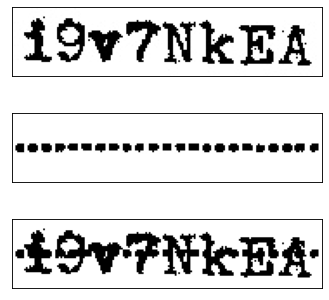

In [1168]:
img = cv2.imread(choice(dir_images_b),0)
art = cv2.imread(choice(dir_artfac_b),0)
img_art, art_crop = img_plus_art(img,art)

fig = plt.figure(figsize=(5, 5), dpi=80)
gs = fig.add_gridspec(3, hspace=0.1)
axs = gs.subplots(sharex=True, sharey=True)
axs[0].imshow(img,cmap='gray')
axs[0].get_xaxis().set_visible(False)
axs[0].get_yaxis().set_visible(False)
axs[1].imshow(art_crop,cmap='gray')
axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
axs[2].imshow(img_art,cmap='gray')
axs[2].get_xaxis().set_visible(False)
axs[2].get_yaxis().set_visible(False)
plt.savefig("interses_prueba6.png",dpi=80)